## Mushroom classification Project

About the dataset:
This dataset contains information about different species of mushrooms and whether they are poisonous or edible. It was originally collected for machine learning purposes, but is now being used to help people identify safe mushrooms to eat. The dataset includes descriptions of 23 different mushroom species and classifies them as either definitely edible, definitely poisonous, or not recommended to eat due to uncertainty about their edibility. It is important to note that there is no simple rule for determining whether a mushroom is safe to eat and that caution should be exercised when trying to identify edible mushrooms.

Summary of the code:

The code begins by reading in the dataset from a file called 'mushrooms.csv', and then checks for null values and determines the data types of the columns. It then drops some unnecessary columns and encodes the categorical variables using a LabelEncoder object. The code then calculates the correlations between the different features and the class label, and plots a heatmap of these correlations. Next, the code splits the processed dataset into training and testing sets, and fits and evaluates three different machine learning models: logistic regression, K-nearest neighbors, and decision tree. Finally, the code produces confusion matrices and classification plots for each of the three models, and compares their performance using their scores.

The hyper parameters for this classification project are the models which are:
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from scipy.stats import anderson, shapiro, normaltest

# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Checking cardinality

In [3]:
descrip = df.describe().T
descrip.sort_values(by='unique', ascending=False)

,count,unique,top,freq
gill-color,8124,12,b,1728
cap-color,8124,10,n,2284
spore-print-color,8124,9,w,2388
odor,8124,9,n,3528
stalk-color-below-ring,8124,9,w,4384
stalk-color-above-ring,8124,9,w,4464
habitat,8124,7,d,3148
cap-shape,8124,6,x,3656
population,8124,6,v,4040
ring-type,8124,5,p,3968


In [4]:
# see if any nulls exist which may add bias to the data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# check to see what columns are numerical and categorical
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
print(f"the unique values for the gill colour are {df['gill-color'].unique()}")
print(f"the unique values for the cap color are {df['cap-color'].unique()}")
print(f"the unique values for the spore print color are {df['spore-print-color'].unique()}")


the unique values for the gill colour are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
the unique values for the cap color are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
the unique values for the spore print color are ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']


### Checking distribution to see if features are under represented

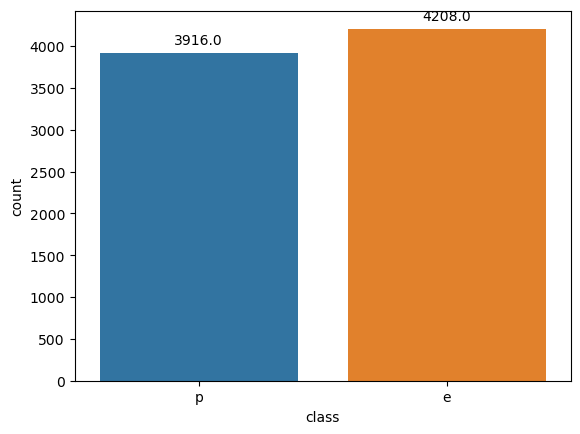

In [7]:
# Create a countplot using seaborn
count_plot = sns.countplot(x='class', data=df)

# Add annotations to the plot
for x in count_plot.patches:
    count_plot.annotate(format(x.get_height(), '.1f'), (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()

Text(0.5, 0.98, 'cap colour class distribution')

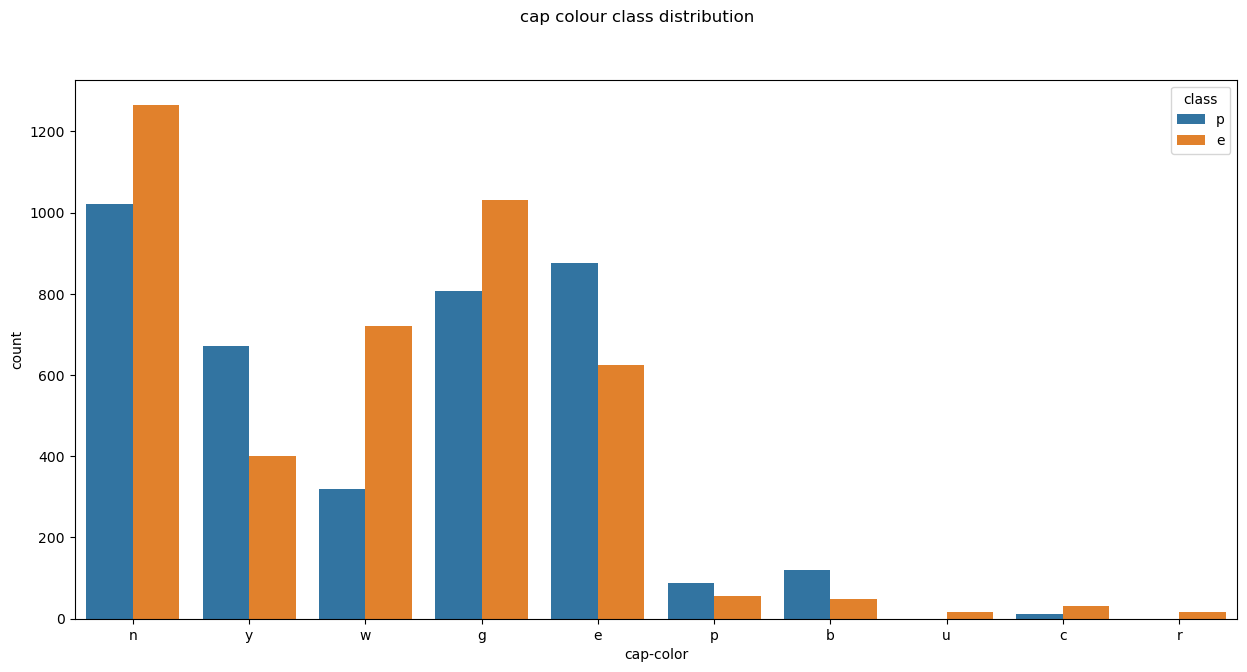

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
count_plot = sns.countplot(x='cap-color', hue = 'class', data=df)
fig.suptitle('cap colour class distribution')

Text(0.5, 0.98, 'gill colour class distribution')

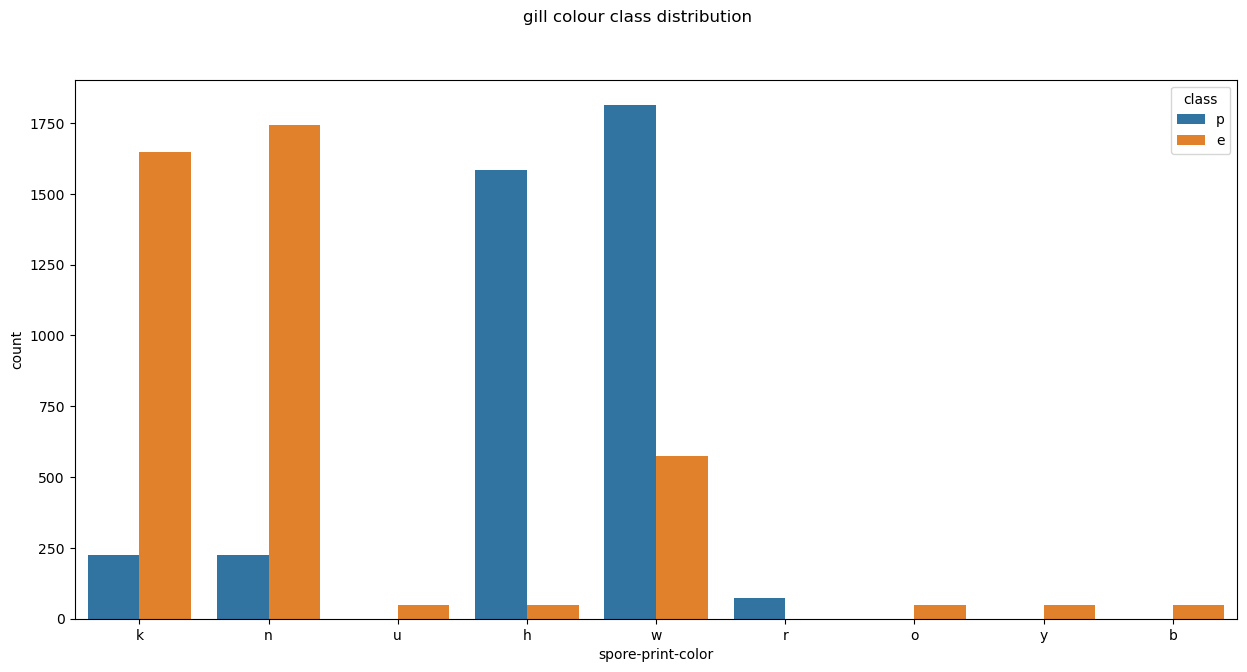

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
count_plot = sns.countplot(x='spore-print-color', hue = 'class', data=df)
fig.suptitle('spore print color class distribution')

Text(0.5, 0.98, 'spore print class distribution')

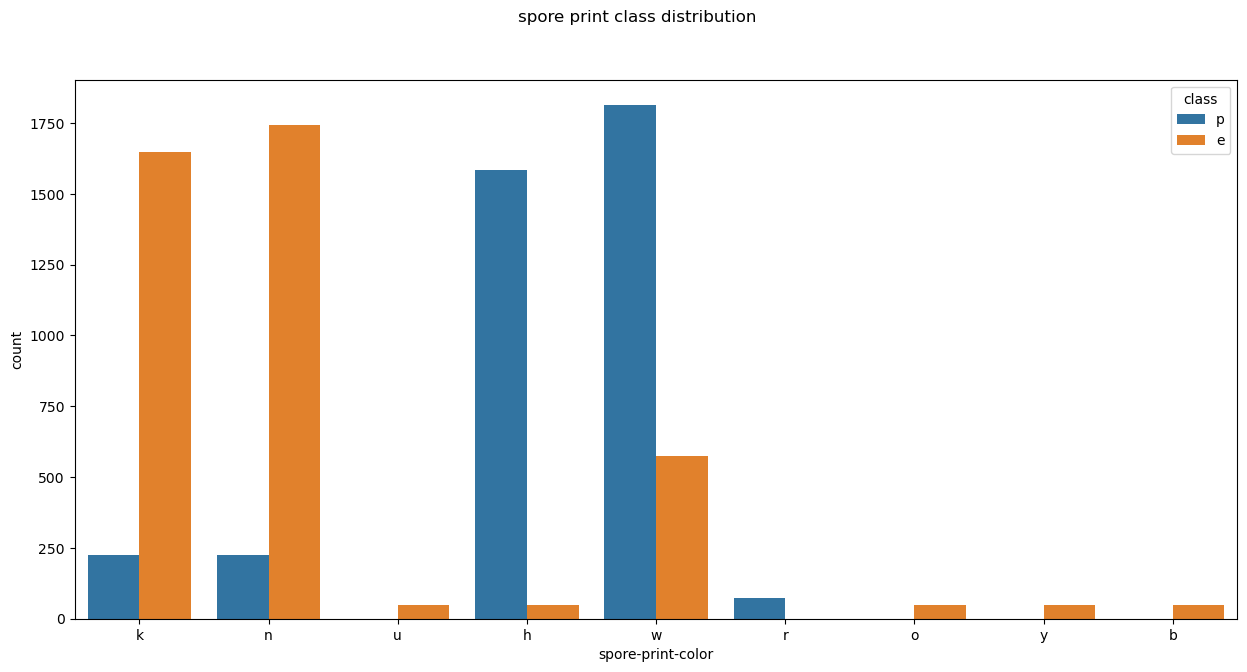

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
count_plot = sns.countplot(x='spore-print-color', hue = 'class', data=df)
fig.suptitle('spore print class distribution')

In [20]:
#drop unnecessary columns
df = df[['gill-color','cap-color','spore-print-color','class']]

# Select all the columns that are of type 'object'
object_columns = df.select_dtypes(['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

def make_dict(keys, values, name = None):
    # Use the zip() function to pair the elements of the lists together
    pairs = zip(keys, values)
    
    # Use a dictionary comprehension to create the dictionary
    name = {key: value for key, value in pairs}
    
    return name


# Iterate over the object columns
for col in object_columns:
    # Apply the LabelEncoder to the column
    df[col] = le.fit_transform(df[col])
    df[col+' decoded'] = le.inverse_transform(df[col])
    


In [22]:
df

,gill-color,cap-color,spore-print-color,class,gill-color decoded,cap-color decoded,spore-print-color decoded,class decoded
0,4,4,2,1,k,n,k,p
1,4,9,3,0,k,y,n,e
2,5,8,3,0,n,w,n,e
3,5,8,2,1,n,w,k,p
4,4,3,3,0,k,g,n,e
...,...,...,...,...,...,...,...,...
8119,11,4,0,0,y,n,b,e
8120,11,4,0,0,y,n,b,e
8121,5,4,0,0,n,n,b,e
8122,0,4,7,1,b,n,w,p


(4.5, -0.5)

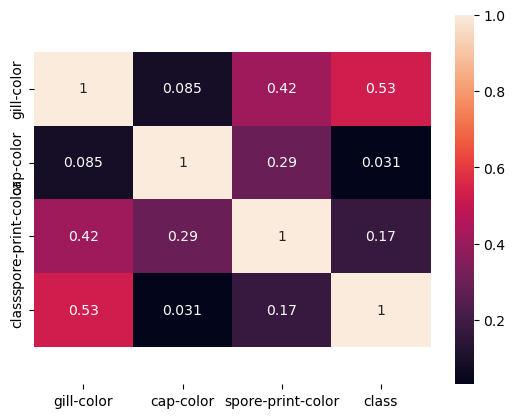

In [23]:
df.corr()['class'].sort_values(ascending = True)
ax = sns.heatmap(abs(df.corr()), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
absolute_correlation_matrix = abs(df.corr()['class'])
sorted_correlation_matrix = absolute_correlation_matrix.sort_index()
sorted_correlation_matrix

cap-color            0.031384
class                1.000000
gill-color           0.530566
spore-print-color    0.171961
Name: class, dtype: float64

 Highest correlation with the class column was found with the gill color, then the spore-print-color and the cap-color respectively

# Summary of EDA and hypothesis
From the EDA process the cardinality was established with a count of all the unique values and the top terms were selected as the general cardinality was low for the dataset.

The bar charts showed that the features were not distributed evenly with a lot of classes within the columns being under represented which can cause the classification models to be skewed.

The correlation matrix showed that the variables did not have a strong correation which suggests that the classifier may be weak.

Decision tree classifiers and K-nearest neighbors (KNN) classifiers can often perform well on datasets with mid to low correlations between the features and the target variable, especially if the data is noisy or has non-linear relationships. This is because decision tree classifiers and KNN classifiers are able to capture complex patterns in the data and make predictions based on similarities between data points. On the other hand, logistic regression is a linear model that is less flexible and may not perform as well on data with complex patterns or non-linear relationships. However, logistic regression can be more efficient to train and may be more interpretable than other models, which can be an advantage in certain cases. 

#### As a result of this, my hypothesis is:
the logistic regression model should perform the best followed by the KNN classifier and then the decision tree model

In [30]:
df_enc = df.iloc[:,:4]

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_enc.drop('class', axis=1)
y = df_enc['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Fit the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Fit the decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Evaluate the models
print("Logistic Regression Score:", log_reg.score(X_test, y_test))
print("KNN Score:", knn.score(X_test, y_test))
print("Decision Tree Score:", tree.score(X_test, y_test))

Logistic Regression Score: 0.7550769230769231
KNN Score: 0.940923076923077
Decision Tree Score: 0.9452307692307692


In [32]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

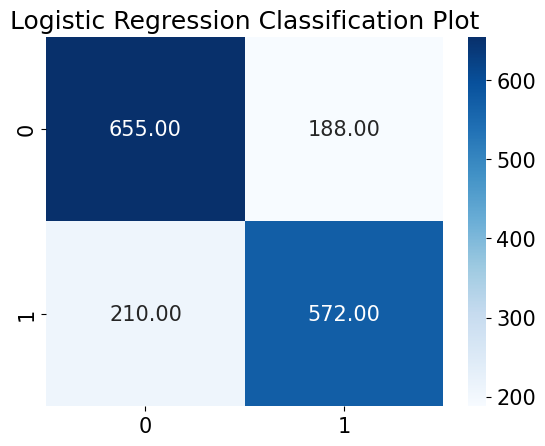

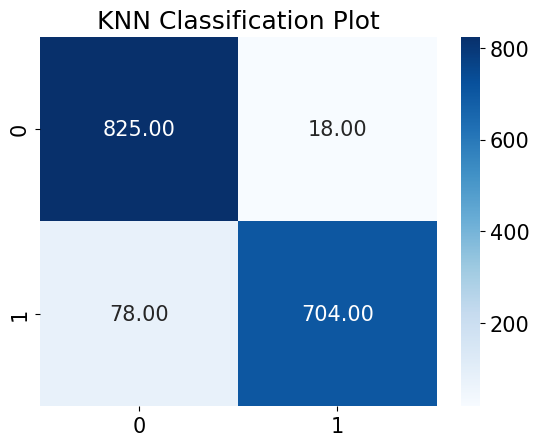

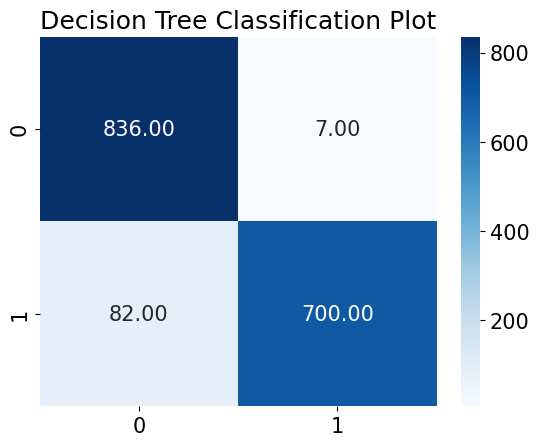

In [33]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the font size for the plots
plt.rcParams.update({'font.size': 15})

# Calculate the confusion matrix for the logistic regression model
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Logistic Regression Classification Plot")
plt.show()

# Calculate the confusion matrix for the KNN model
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("KNN Classification Plot")
plt.show()

# Calculate the confusion matrix for the decision tree model
cm = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Decision Tree Classification Plot")
plt.show()

In [37]:
# Calculate F1 score for Logistic Regression model
logreg_f1 = f1_score(y_test, y_pred_log_reg)

# Calculate F1 score for KNN model
knn_f1 = f1_score(y_test, y_pred_knn)

# Calculate F1 score for Decision Tree model
dt_f1 = f1_score(y_test, y_pred_tree)
 # Create a dictionary of F1 scores for each model
model_f1_scores = {'KNN': knn_f1, 'Logistic Regression': logreg_f1, 'Decision Tree': dt_f1} 
# Identify the model with the highest F1 score
best_model = max(model_f1_scores, key=model_f1_scores.get)
highest_value = max(model_f1_scores.values())
print(f"The f1 scores were {model_f1_scores}")
print(f"The best model was the {best_model} classifier")
print(f"The accuracy of the model was {highest_value}")

The f1 scores were {'KNN': 0.9361702127659575, 'Logistic Regression': 0.74189364461738, 'Decision Tree': 0.9402283411685695}
The best model was the Decision Tree classifier
The accuracy of the model was 0.9402283411685695


In conclusion the best model based on the confusion matrix and the F1 score was the Decision Tree, followed by KNN and then the logistic regression which is the opposite to what was expected
This may have been caused by using the defualt settings of the data and the overall complexity of the model being underestimated.
For future work the following changes/additions should be made:
- More variables should be tested to see the performance on a wider scale
- The models can should have their own parameters optimised via gridsearhCV
- The models should be run across multiple random states and their accuracies averaged to get a more thorough understanding on the general performance of the models